In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.15.0


In [15]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [16]:
def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(512, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0005),
                    loss="mse",
                    metrics=['mae'])
      return model

EPOCHS = 30
BATCH_SIZE=128

DATASET=pd.read_csv('data_nowe/dane_scalone_wybrane.csv')


In [17]:
DATASET

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
2096635,1.0,7.0,0.996528,0.0
2096636,1.0,7.0,0.997222,0.0
2096637,1.0,7.0,0.997917,0.0
2096638,1.0,7.0,0.998611,0.0


MODEL A - INPUT(dzień tygodnia, pora dnia) OUTPUT(przepływ)

In [18]:
dataset = DATASET
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model =build_and_compile_model_input(2)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/30
13104/13104 [==============================] - 28s 2ms/step - loss: 0.7042 - mae: 0.1657
Epoch 2/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6970 - mae: 0.1631
Epoch 3/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6932 - mae: 0.1627
Epoch 4/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6954 - mae: 0.1627
Epoch 5/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6918 - mae: 0.1629
Epoch 6/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6912 - mae: 0.1637
Epoch 7/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6912 - mae: 0.1629
Epoch 8/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6907 - mae: 0.1628
Epoch 9/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6907 - mae: 0.1630
Epoch 10/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6903 - mae: 0.1627

In [19]:
model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

3276/3276 [==============================] - 4s 1ms/step - loss: 0.6934 - mae: 0.1584


[0.6934189796447754, 0.1584150195121765]

45/45 [==============================] - 0s 844us/step


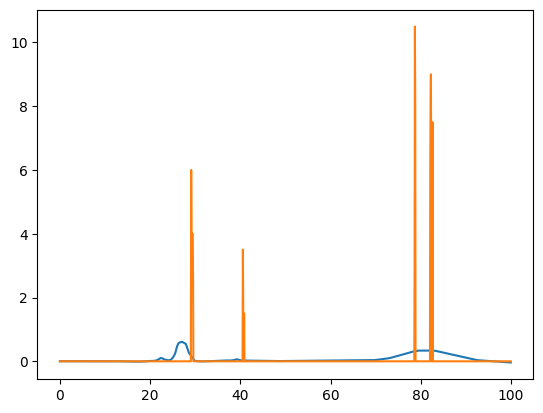

In [20]:
flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time_plot, flow_result)
plt.plot(flow_time_plot, DATASET.Przeplyw.iloc[0:1440])

MODEL B - MODEL A - INPUT(pora dnia) OUTPUT(przepływ)


In [21]:
def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

PORÓWNIANIE DNI TYGODNIA

In [22]:
dataset = DATASET
[x,y]=prep_data(dataset,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_pon = build_and_compile_model_input(1)
model_pon.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_pon=np.arange(0,100,100/1440) 
flow_result_pon = model_pon.predict(flow_time_pon).T
# plt.plot(flow_time_pon, flow_result_pon.reshape(1440))


dataset = DATASET
[x,y]=prep_data(dataset,2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_wt = build_and_compile_model_input(1)
model_wt.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_wt=np.arange(0,100,100/1440) 
flow_result_wt = model_wt.predict(flow_time_wt)
# plt.plot(flow_time_wt, flow_result_wt.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_sr = build_and_compile_model_input(1)
model_sr.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_sr=np.arange(0,100,100/1440)  
flow_result_sr = model_sr.predict(flow_time_sr)   
# plt.plot(flow_time_sr, flow_result_sr.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_czw = build_and_compile_model_input(1)
model_czw.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_czw=np.arange(0,100,100/1440) 
flow_result_czw = model_czw.predict(flow_time_czw)   
# plt.plot(flow_time_czw, flow_result_czw.reshape(1440))

dataset = DATASET
[x,y]=prep_data(dataset,5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_pt = build_and_compile_model_input(1)
model_pt.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_pt=np.arange(0,100,100/1440)  
flow_result_pt = model_pt.predict(flow_time_pt)   
# plt.plot(flow_time_pt, flow_result_pt.reshape(1440))


dataset = DATASET
[x,y]=prep_data(dataset,6)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_sob = build_and_compile_model_input(1)
model_sob.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_sob=np.arange(0,100,100/1440) 
flow_result_sob = model_sob.predict(flow_time_sob)   
# plt.plot(flow_time_sob, flow_result_sob.reshape(1440))


dataset = DATASET
[x,y]=prep_data(dataset,7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_nd = build_and_compile_model_input(1)
model_nd.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_nd=np.arange(0,100,100/1440) 
flow_result_nd = model_nd.predict(flow_time_nd)   
# plt.plot(flow_time_nd, flow_result_nd.reshape(1440))

Epoch 1/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8429 - mae: 0.1960
Epoch 2/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8347 - mae: 0.1862
Epoch 3/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8340 - mae: 0.1875
Epoch 4/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8330 - mae: 0.1886
Epoch 5/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8318 - mae: 0.1884
Epoch 6/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8309 - mae: 0.1873
Epoch 7/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8298 - mae: 0.1869
Epoch 8/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8277 - mae: 0.1862
Epoch 9/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8246 - mae: 0.1855
Epoch 10/30
1872/1872 [==============================] - 4s 2ms/step - loss: 0.8227 - mae: 0.1866
Epoch 11/30
1872/1872 [======

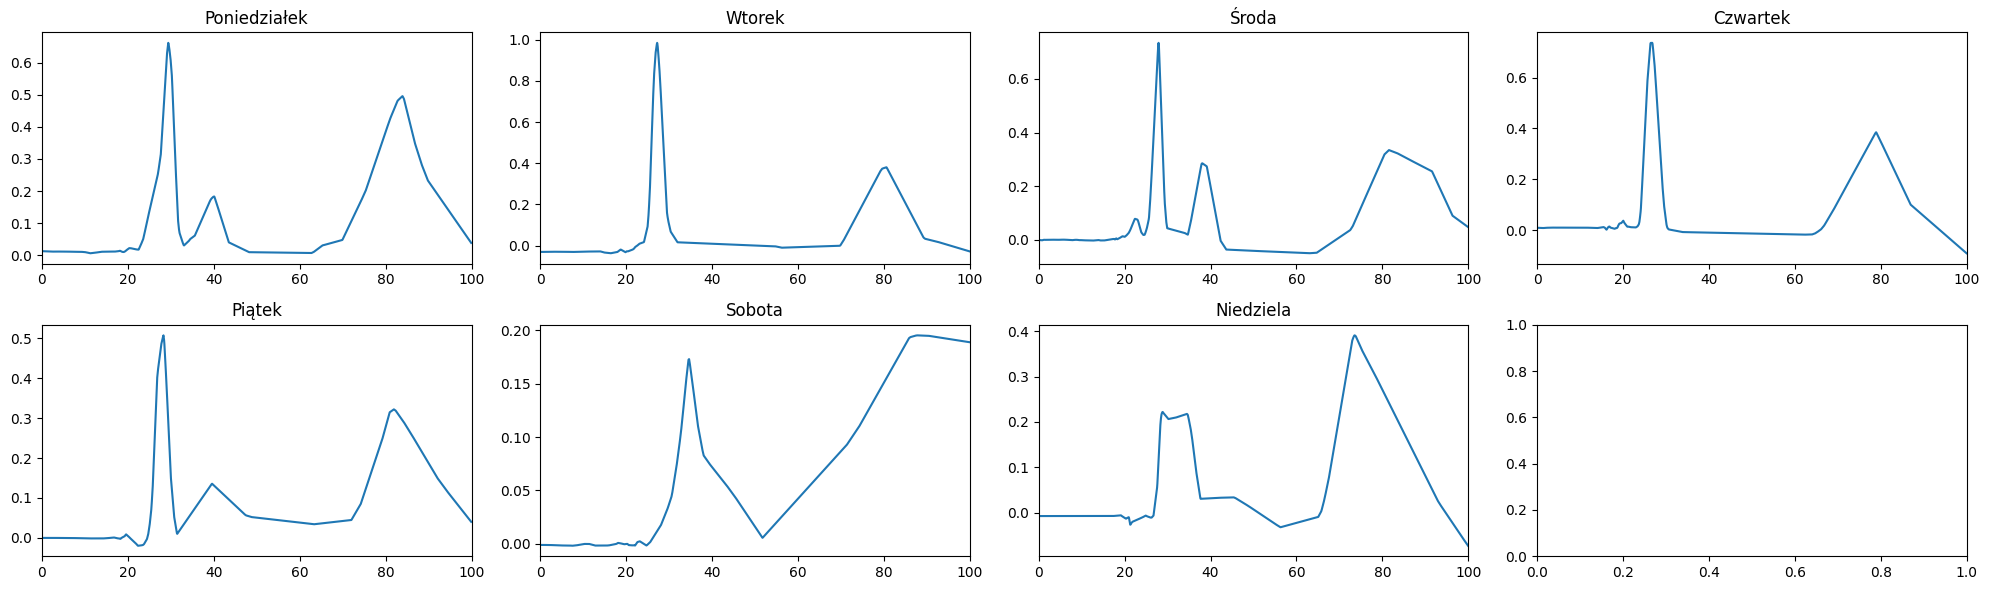

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(1440))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(1440))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(1440))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(1440))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(1440))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(1440))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_nd, flow_result_nd.reshape(1440))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

MODEL C - MODEL A - INPUT(pora roku, dzień tygodnia, pora dnia) OUTPUT(przepływ)

In [24]:
def prep_data(data,sezon):
      data = data[data['Pora_roku'] == sezon]
      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      
      return [x,y]

WSZYSTKIE PORY ROKU

Epoch 1/30
13104/13104 [==============================] - 27s 2ms/step - loss: 0.7031 - mae: 0.1656
Epoch 2/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6980 - mae: 0.1623
Epoch 3/30
13104/13104 [==============================] - 26s 2ms/step - loss: 0.6949 - mae: 0.1626
Epoch 4/30
13104/13104 [==============================] - 25s 2ms/step - loss: 0.6923 - mae: 0.1628
Epoch 5/30
13104/13104 [==============================] - 25s 2ms/step - loss: 0.6927 - mae: 0.1625
Epoch 6/30
13104/13104 [==============================] - 25s 2ms/step - loss: 0.6907 - mae: 0.1623
Epoch 7/30
13104/13104 [==============================] - 25s 2ms/step - loss: 0.6903 - mae: 0.1622
Epoch 8/30
13104/13104 [==============================] - 25s 2ms/step - loss: 0.6899 - mae: 0.1618
Epoch 9/30
13104/13104 [==============================] - 25s 2ms/step - loss: 0.6896 - mae: 0.1619
Epoch 10/30
13104/13104 [==============================] - 25s 2ms/step - loss: 0.6892 - mae: 0.1612

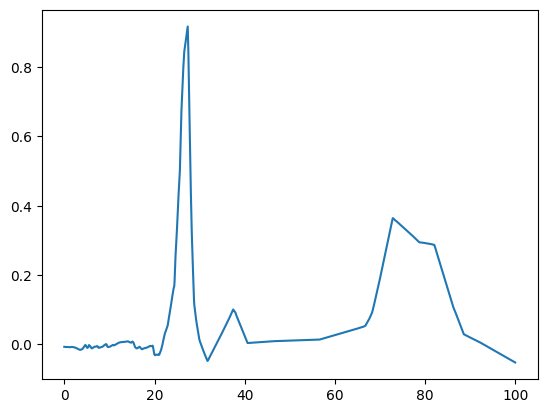

In [25]:
dataset = DATASET

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_pon = build_and_compile_model_input(3)
model_pon.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),1*np.ones_like(flow_time_plot, dtype=int),flow_time_plot)).T
flow_result = model_pon.predict(flow_time)   

plt.plot(flow_time_plot, flow_result)

PORÓWNIANIE PÓR ROKU

In [26]:
dataset = DATASET
[x,y]=prep_data(dataset,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_spring = build_and_compile_model_input(3)
model_spring.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_spring_plot=np.arange(0,100,100/1440) 
flow_time_spring=np.vstack((1*np.ones_like(flow_time_spring_plot, dtype=int),1*np.ones_like(flow_time_spring_plot, dtype=int),flow_time_spring_plot)).T
flow_result_spring = model_spring.predict(flow_time_spring)   
# plt.plot(flow_time_spring_plot, flow_result_spring)

dataset = DATASET
[x,y]=prep_data(dataset,2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_summer = build_and_compile_model_input(3)
model_summer.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_summer_plot=np.arange(0,100,100/1440) 
flow_time_summer=np.vstack((2*np.ones_like(flow_time_summer_plot, dtype=int),1*np.ones_like(flow_time_summer_plot, dtype=int),flow_time_summer_plot)).T
flow_result_summer = model_summer.predict(flow_time_summer)   
# plt.plot(flow_time_summer_plot, flow_result_summer)


dataset = DATASET
[x,y]=prep_data(dataset,3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_fall = build_and_compile_model_input(3)
model_fall.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_fall_plot=np.arange(0,100,100/1440) 
flow_time_fall=np.vstack((3*np.ones_like(flow_time_fall_plot, dtype=int),1*np.ones_like(flow_time_fall_plot, dtype=int),flow_time_fall_plot)).T
flow_result_fall = model_fall.predict(flow_time_fall)   
# plt.plot(flow_time_fall_plot, flow_result_fall)

dataset = DATASET
[x,y]=prep_data(dataset,4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_winter = build_and_compile_model_input(3)
model_winter.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
flow_time_winter_plot=np.arange(0,100,100/1440) 
flow_time_winter=np.vstack((4*np.ones_like(flow_time_winter_plot, dtype=int),1*np.ones_like(flow_time_winter_plot, dtype=int),flow_time_winter_plot)).T
flow_result_winter = model_winter.predict(flow_time_winter)   
# plt.plot(flow_time_winter_plot, flow_result_winter)

Epoch 1/30
3276/3276 [==============================] - 8s 2ms/step - loss: 23.8250 - mae: 0.9053
Epoch 2/30
3276/3276 [==============================] - 7s 2ms/step - loss: 1.4039 - mae: 0.5993
Epoch 3/30
3276/3276 [==============================] - 7s 2ms/step - loss: 8.9109 - mae: 0.7459
Epoch 4/30
3276/3276 [==============================] - 7s 2ms/step - loss: 1.3704 - mae: 0.6183
Epoch 5/30
3276/3276 [==============================] - 7s 2ms/step - loss: 0.9427 - mae: 0.3856
Epoch 6/30
3276/3276 [==============================] - 7s 2ms/step - loss: 1.1749 - mae: 0.2979
Epoch 7/30
3276/3276 [==============================] - 6s 2ms/step - loss: 0.7984 - mae: 0.2391
Epoch 8/30
3276/3276 [==============================] - 7s 2ms/step - loss: 0.8250 - mae: 0.2133
Epoch 9/30
3276/3276 [==============================] - 7s 2ms/step - loss: 0.7691 - mae: 0.1807
Epoch 10/30
3276/3276 [==============================] - 7s 2ms/step - loss: 0.7626 - mae: 0.1785
Epoch 11/30
3276/3276 [=====

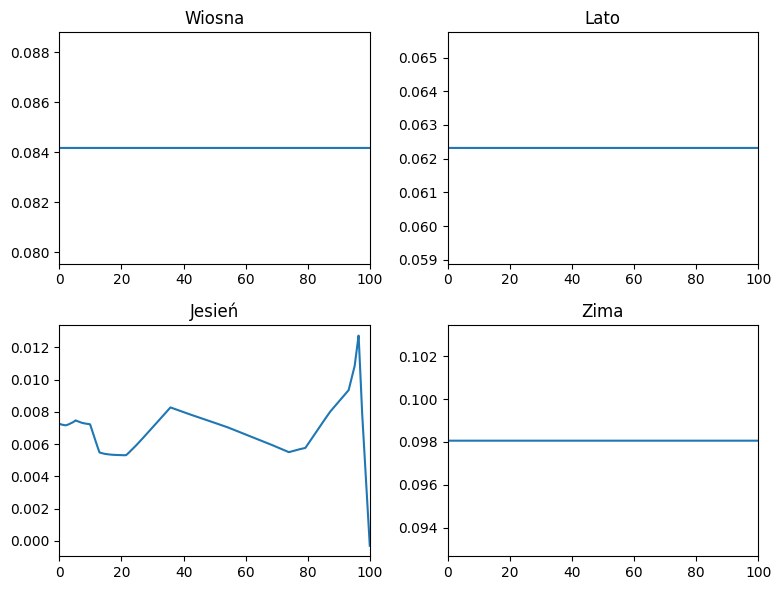

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_spring_plot, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_summer_plot, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 100)

axs[1,0].plot(flow_time_fall_plot, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_winter_plot, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 100)

plt.tight_layout()

plt.show()